### **EDA + LOGISTIC REGRESSION - Banking Marketing Campaign**

**STEP 1: LOAD THE DATA FRAME**

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
df.head()
                 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**STEP 2: INICIAL ANALYSIS, DEFINING VARIABLES AND DATA CLEANING**

In [2]:
print("Dimension of data frame: ", df.shape)

Dimension of data frame:  (41188, 21)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#CHECKING AND ANALYSING THE COLUMNS

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In conclusion we have 41188 rows in 21 columns, with the followings variables:

_**Categorical**_

-`job`: type of client's job. 
-``marital``: Marital status of the client.
-``education``: Customer's educational level.
-``default``: credit in default, yes or no.
-``housing``: Housing loan, yes or no.
-``loan``: Personal loan, yes or no.
-``contact``: Type of contact communication.
-``month``: Last contact month in the year.
``day_of_week``: Last day of contact in the week.
``poutcome``: Result of the previous marketing campaign.
``y``: Target variable. Indicates whether the customer has subscribed to a term deposit, yes or no.

_**Numerical**_

``age``: Age of the customer 1
``duration``: Duration of the last contact in seconds.
``campaign``: Number of contacts made during this campaign and for this customer.
``pdays``: Number of days that passed after the customer was last contacted from a previous campaign (999 means that the customer was not contacted previously).
``previous``: Number of contacts made before this campaign and for this customer.
``emp.var.rate``: Employment variation rate - quarterly indicator.
``cons.price.idx``: Consumer price index - monthly indicator.
``cons.conf.idx``: Consumer confidence index - monthly indicator.
``euribor3m``: 3-month Euribor rate - daily indicator.
``nr.employed``: Number of employees - quarterly indicator.

In [5]:
# FINDING THE DUPLICATE DATA

print(f"age :{df['age'].duplicated().sum()}")
print(f"y: {df['y'].duplicated().sum()}")


age :41110
y: 41186


In [6]:
# DELETING THE IRRELEVANT INFORMATION

df.drop(['emp.var.rate','cons.price.idx','euribor3m', 'nr.employed','day_of_week'], axis = 1, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,-36.4,no


``emp.var.rate``,``cons.price.idx``,``euribor3m``, ``nr.employed``, These variables have been eliminated as they represent macroeconomic indicators that may not have a direct and significant influence on the individual customer's decision. The focus will be on variables related to the individual characteristics of customers and their history of interactions with the bank.

**STEP 3: ANALYSIS OF VARIABLES**

**_3.0 Categorical:_**

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.conf.idx', 'y'],
      dtype='object')

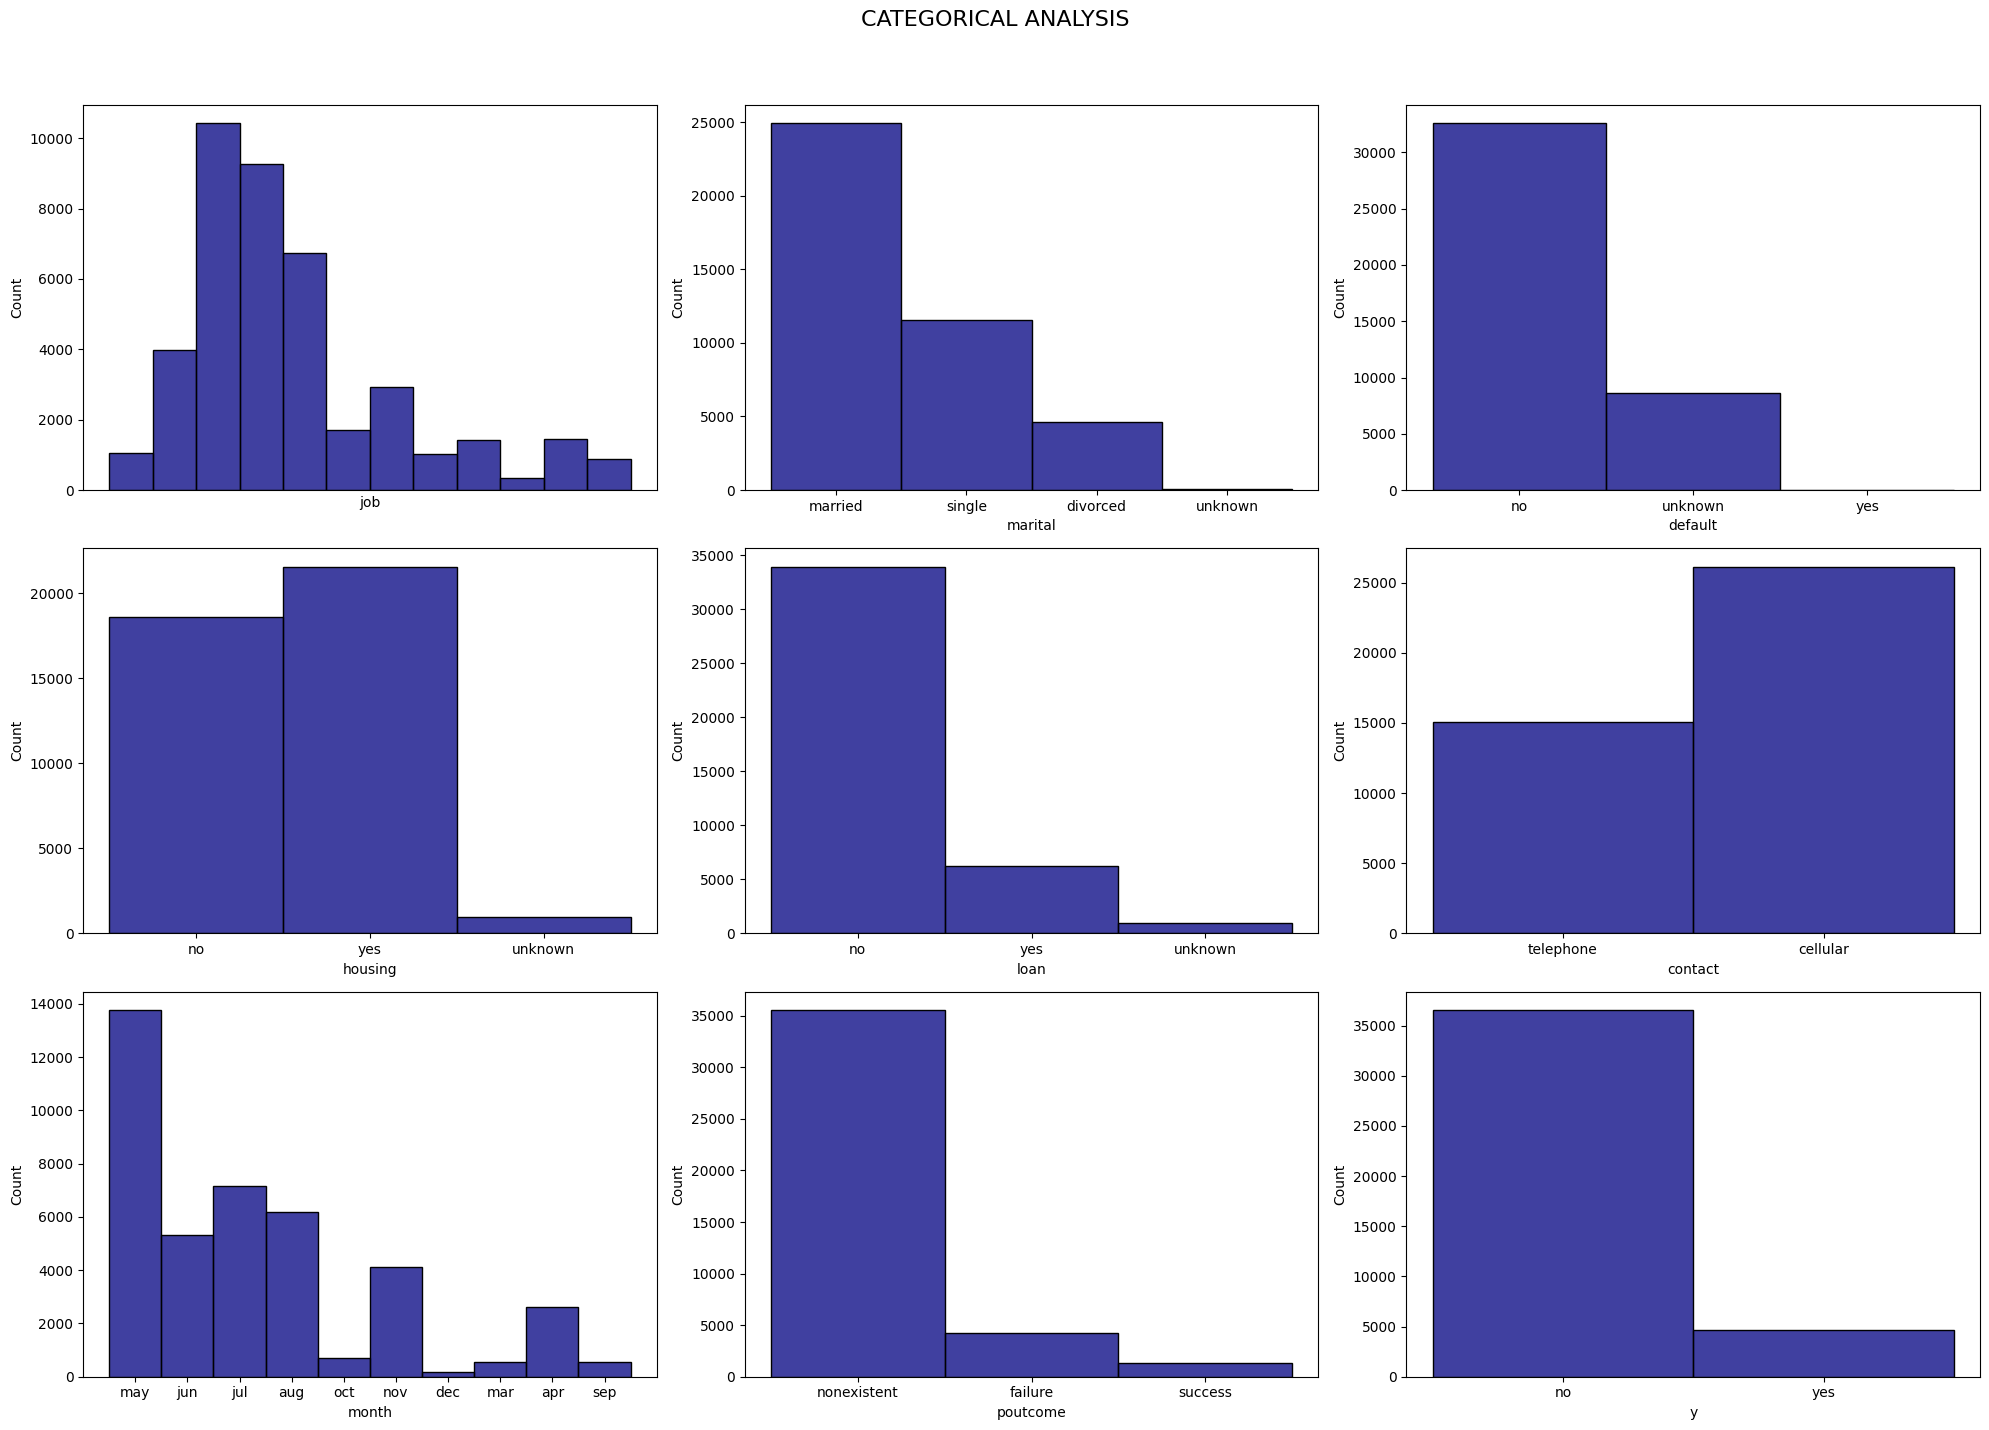

<Figure size 640x480 with 0 Axes>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axis = plt.subplots(3, 3, figsize=(20, 15))

color = 'navy'

sns.histplot(ax=axis[0, 0], data=df, x="job", color=color).set_xticks([])
sns.histplot(ax=axis[0, 1], data=df, x="marital", color=color)
sns.histplot(ax=axis[0, 2], data=df, x="default", color=color)
sns.histplot(ax=axis[1, 0], data=df, x="housing", color=color)
sns.histplot(ax=axis[1, 1], data=df, x="loan", color=color)
sns.histplot(ax=axis[1, 2], data=df, x="contact", color=color)
sns.histplot(ax=axis[2, 0], data=df, x="month", color=color)
sns.histplot(ax=axis[2, 1], data=df, x="poutcome", color=color)
sns.histplot(ax=axis[2, 2], data=df, x="y", color=color)

plt.suptitle("CATEGORICAL ANALYSIS", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.tight_layout()
plt.show()


- Se concentra la mayor parte de clientes en un rango de profesion, siendo la mayoria de ellos en un estado civil casado.
- Al menos el 70% de los clientes no posee un credito, pero su mayoria tienen hipoteca en vigencia.

**_3.1 Numerical:_**

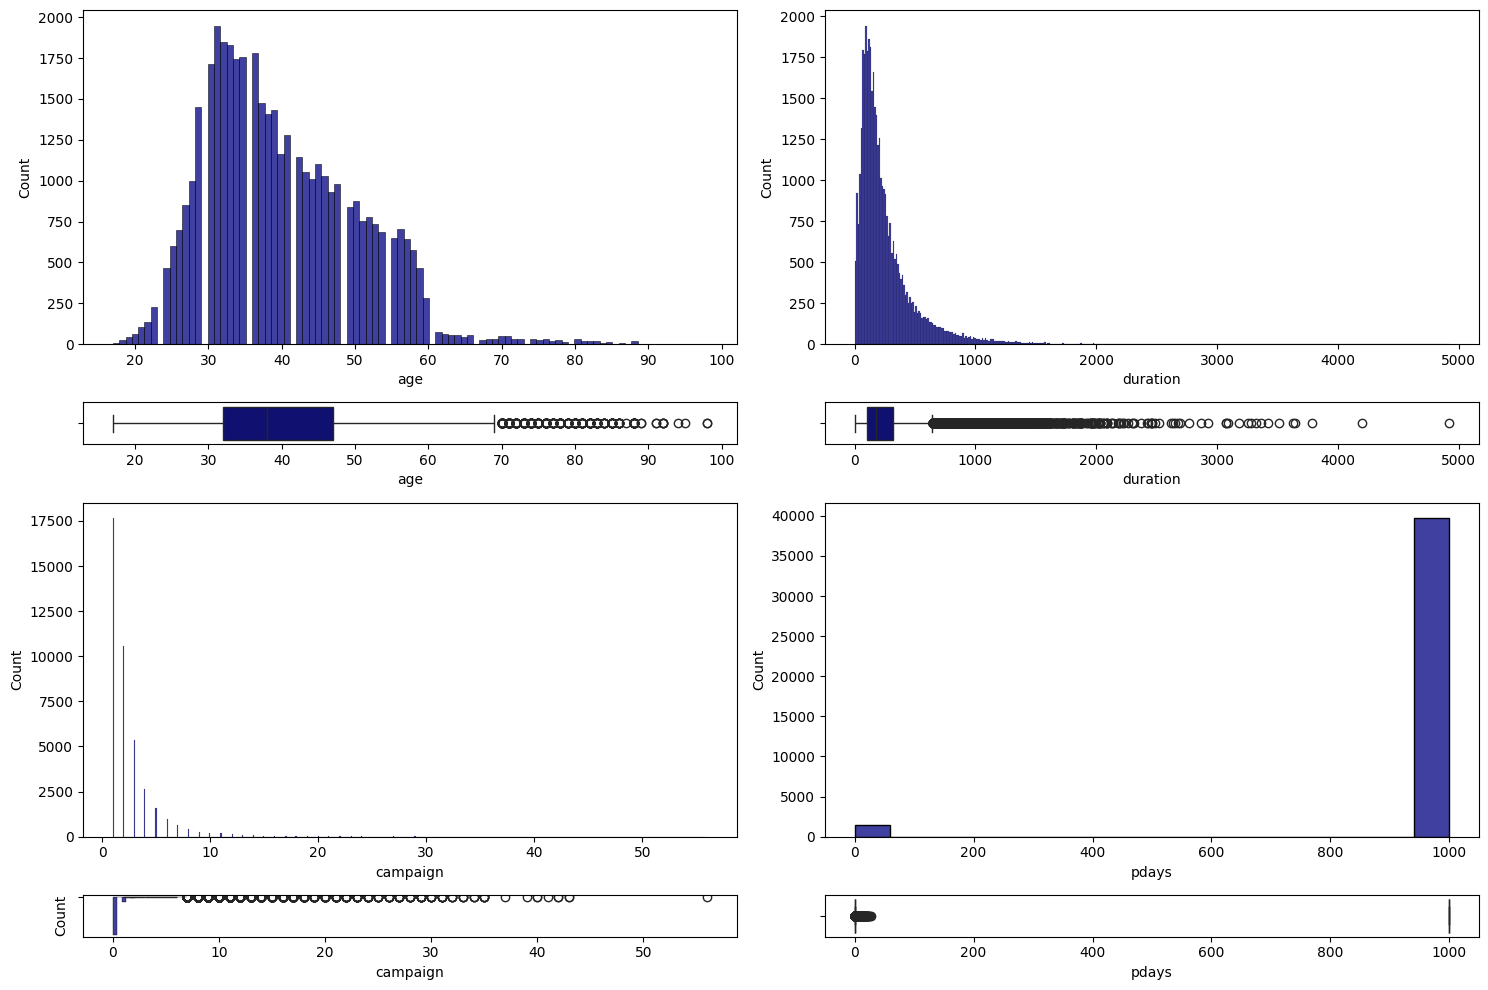

In [9]:
# Create the figure
fig, axis = plt.subplots(4, 2, figsize = (15, 10), gridspec_kw = {"height_ratios": [8, 1, 8, 1]})

color = 'navy'

sns.histplot(ax=axis[0, 0], data=df, x="age", color=color)
sns.boxplot(ax=axis[1, 0], data=df, x="age", color=color)

sns.histplot(ax=axis[0, 1], data=df, x="duration", color=color)
sns.boxplot(ax=axis[1, 1], data=df, x="duration", color=color)

sns.histplot(ax=axis[2, 0], data=df, x="campaign", color=color)
sns.boxplot(ax=axis[3, 0], data=df, x="campaign", color=color)

sns.histplot(ax=axis[2, 1], data=df, x="pdays", color=color)
sns.boxplot(ax=axis[3 ,1], data=df, x="pdays", color=color)

sns.histplot(ax=axis[3, 0], data=df, x="previous", color=color)
sns.boxplot(ax=axis[3 ,1], data=df, x="previous", color=color)


# Adjust the layout
plt.tight_layout()

# Display the layout
plt.show()

**_3.2 Numerical-numerical:_**

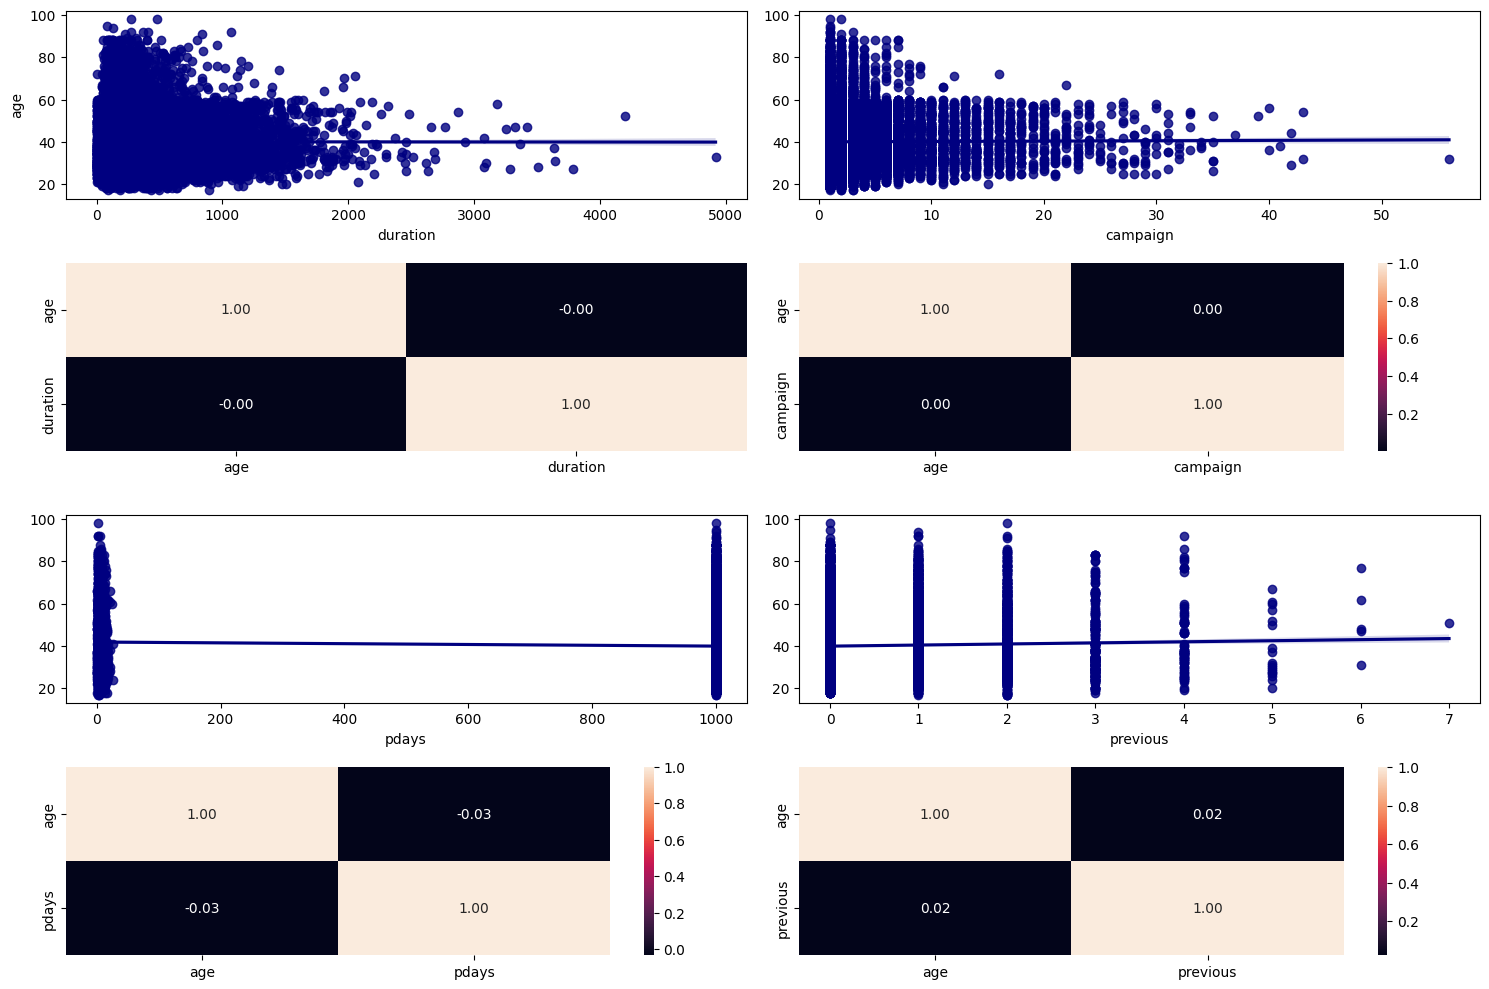

In [10]:
# Creating the figures
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

# Set axis labels
sns.regplot(ax = axis[0, 0], data = df, x = "duration", y = "age", color= "navy")
sns.heatmap(df[["age", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False, color="navy")

sns.regplot(ax = axis[0, 1], data = df, x = "campaign", y = "age", color="navy").set(ylabel = None)
sns.heatmap(df[["age", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], color="navy")

sns.regplot(ax = axis[2, 0], data = df, x = "pdays", y = "age", color="navy").set(ylabel = None)
sns.heatmap(df[["age", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], color="navy").set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = df, x = "previous", y = "age", color="navy").set(ylabel = None)
sns.heatmap(df[["age", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], color="navy").set(ylabel = None)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()